In [57]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from flask import Flask, jsonify

In [58]:
import numpy as np
import pandas as pd
import datetime as dt
import os
from scipy import stats


# Reflect Tables into SQLAlchemy ORM

In [60]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from datetime import timedelta

In [61]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [62]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)



/var/folders/l8/3pt745bj661_fztz95jhn3cr0000gn/T/ipykernel_37769/3303615669.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [63]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [64]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [67]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print("The most recent date in the dataset is:", recent_date)

The most recent date in the dataset is: 2017-08-23


In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
inspector.get_table_names()
columns = inspector.get_columns('measurement') 

# Starting from the most recent data point in the database. 
session.query(Measurement.date, Measurement.prcp).all()



[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [69]:
# The date 1 year ago from the last data point in the database
date_one_yr_ago_dt = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
query_date = date_one_yr_ago_dt.strftime('%Y-%m-%d')
query_date

'2016-08-23'

In [70]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).order_by(Measurement.date).all()
results


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [71]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df['date'] = pd.to_datetime(df['date']) 
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_index()
df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [72]:
# Sort the dataframe by date

date_df = df.sort_values(by = "date")
date_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


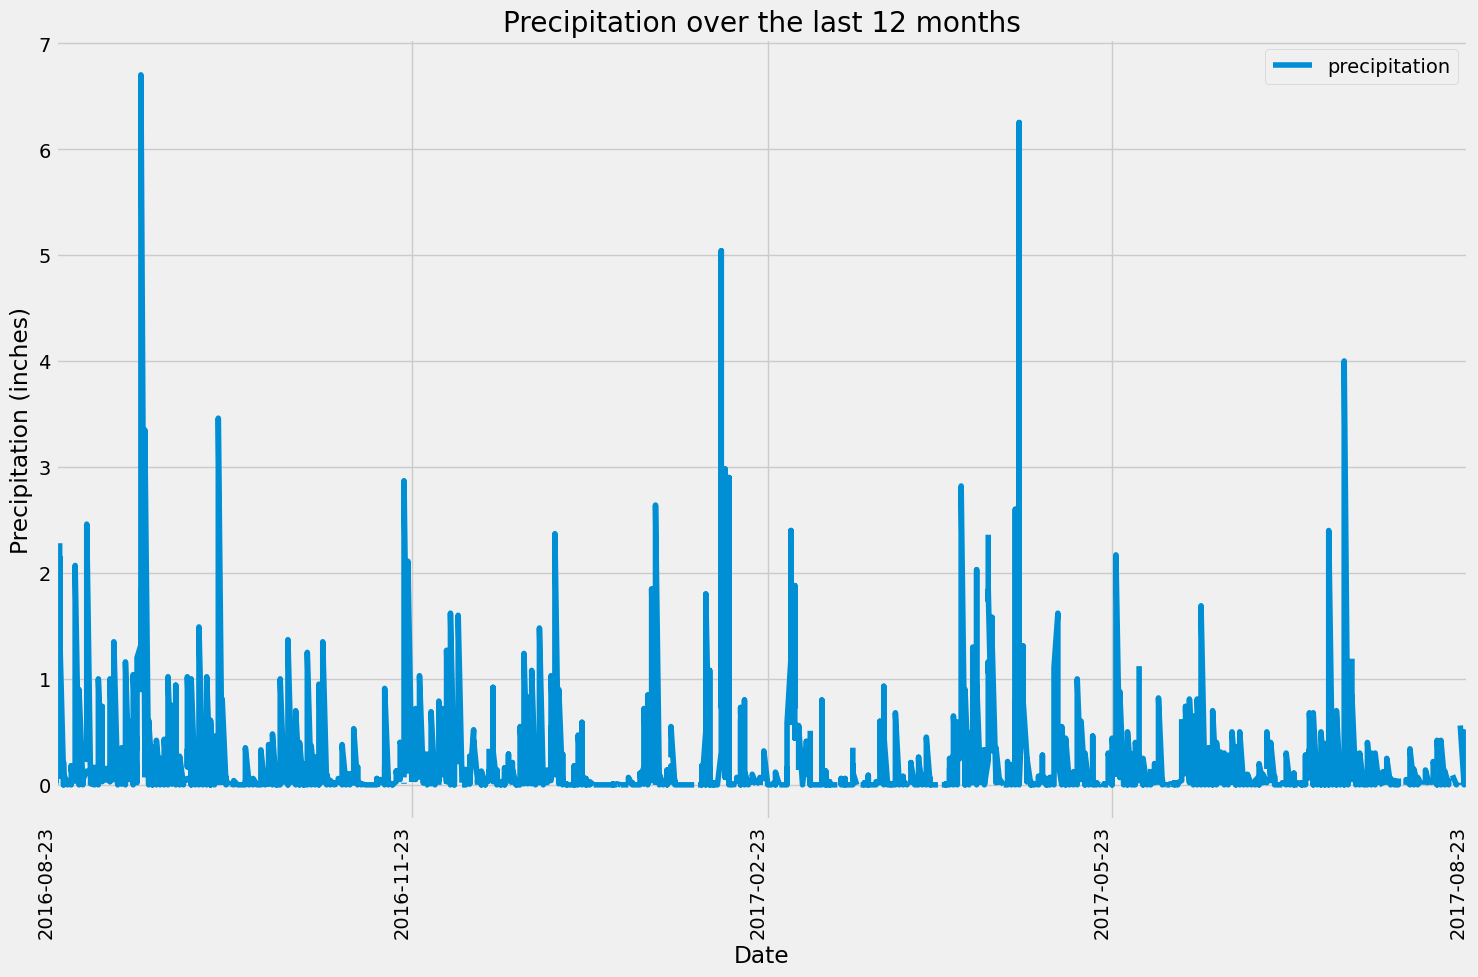

In [73]:
xloc = ['2016-08-23', '2016-11-23', '2017-02-23', '2017-05-23', '2017-08-23']
xloc = pd.to_datetime(xloc)  # Convert xloc to datetime to match the DataFrame index

# Plot using DataFrame's built-in plotting function
ax = df.plot(y='precipitation', figsize=(15, 10), title='Precipitation over the last 12 months')

# Set the x-axis labels
plt.xticks(xloc, rotation=90)

# Set axis labels
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

# Adjust x-axis limits to match the DataFrame's index
plt.xlim(df.index.min(), df.index.max())

plt.tight_layout()  

# Save the figure to a file
plt.savefig('Images/precipitation_plot.png', dpi=300)  
 # Display the plot
plt.show() 

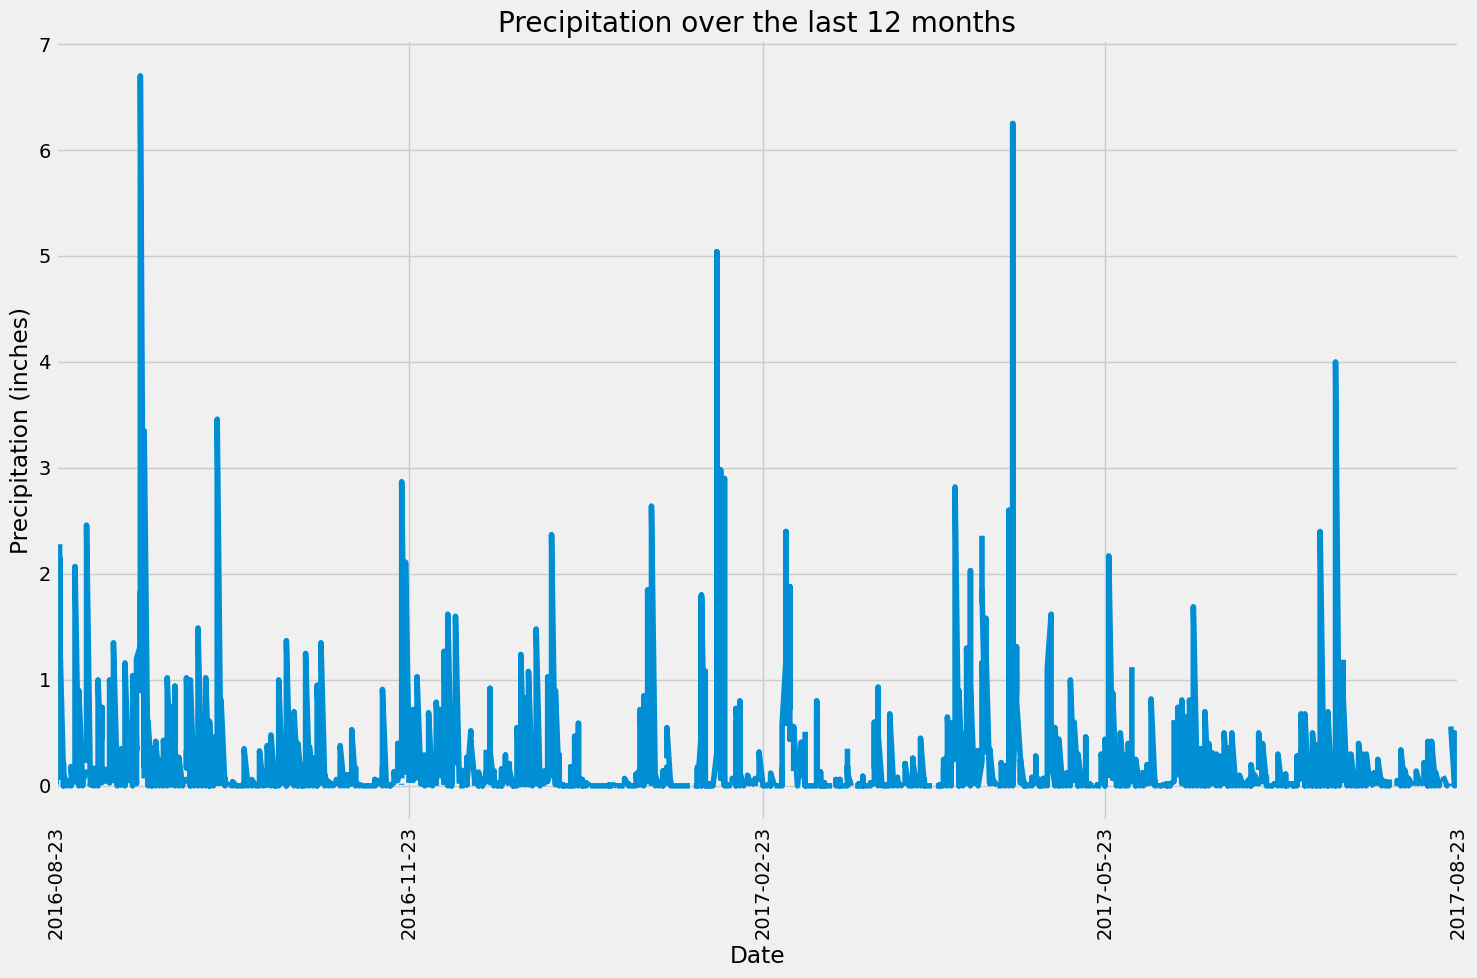

In [74]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(df.index, df['precipitation'])
plt.title('Precipitation over the last 12 months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

# Set x location
xloc = ['2016-08-23', '2016-11-23', '2017-02-23', '2017-05-23', '2017-08-23']
xloc = pd.to_datetime(xloc)  # Convert xloc to datetime to match the DataFrame index
plt.xticks(xloc, rotation=90)

plt.xlim(df.index.min(), df.index.max())  # Adjust the x-axis limits to match the DataFrame
plt.tight_layout()
plt.show()

In [75]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [77]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [78]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

comp = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]

print("Most active stations:")
for station in most_active_stations:
    print(f"Station {station[0]}: {station[1]} observations")



Most active stations:
Station USC00519281: 2772 observations
Station USC00519397: 2724 observations
Station USC00513117: 2709 observations
Station USC00519523: 2669 observations
Station USC00516128: 2612 observations
Station USC00514830: 2202 observations
Station USC00511918: 1979 observations
Station USC00517948: 1372 observations
Station USC00518838: 511 observations


In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

print(f"\nTemperature stats for station {most_active_station}:")
print(f"Lowest temperature: {temp_stats[0][0]}")
print(f"Highest temperature: {temp_stats[0][1]}")
print(f"Average temperature: {temp_stats[0][2]:.2f}")



Temperature stats for station USC00519281:
Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66


In [80]:
# Define sel as a list of the functions you want to apply
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

# Query the minimum, maximum, and average temperatures for the most active station
temp_stats = session.query(*sel).filter(Measurement.station == most_active_station).all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [81]:
# Using the most active station id
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()

# Get the station ID
most_active_station_id = most_active_stations[0] if most_active_stations else None
most_active_station_id

'USC00519281'

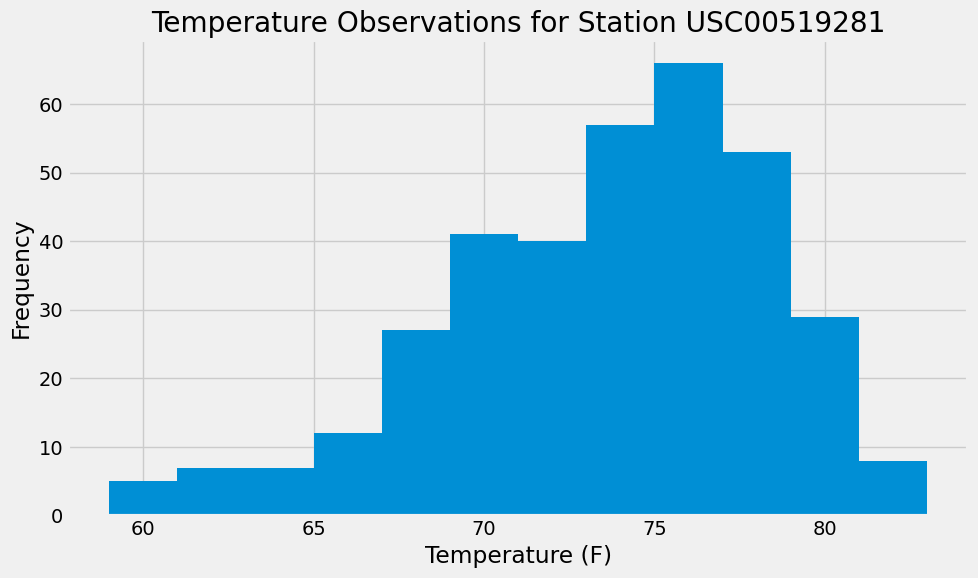

In [82]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.tobs).desc()).first()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= query_date).all()

# Convert to a list
temp_data = [temp[0] for temp in temp_data]

# Plot the results as a histogram
plt.figure(figsize=(10,6))
plt.hist(temp_data, bins=12)
plt.title(f'Temperature Observations for Station {most_active_station}')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Images/TOBs.png', dpi=300)  
plt.show()


In [110]:
# Close Session
session.close()